In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
total_dep_score = pd.read_csv('../data/0&1/total_secd_diag.csv')

X_t = total_dep_score.copy()
del X_t['secd_diag']

y_t = total_dep_score['secd_diag']

In [3]:
y_t.value_counts() 

0.0    2721
1.0     322
Name: secd_diag, dtype: int64

In [4]:
2721 / (2721 + 322) 

0.8941833716726915

In [5]:
print(X_t)
print(y_t)

      comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0             2          2          1          1        2        2
1             2          1          1          1        2        3
2             3          3          3          1        2        2
3             1          2          1          1        1        2
4             2          3          0          0        2        2
...         ...        ...        ...        ...      ...      ...
3038          3          3          2          2        2        3
3039          2          3          1          1        1        2
3040          0          0          0          0        2        0
3041          2          3          1          1        1        2
3042          1          2          2          2        0        1

[3043 rows x 6 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3038    0.0
3039    0.0
3040    0.0
3041    1.0
3042    0.0
Name: secd_diag, Length: 3043, dtype: f

In [6]:
sampled_dep_score = pd.read_csv('../data/0&1/sampled_secd_diag.csv')

X_s = sampled_dep_score.copy()
del X_s['secd_diag']

y_s = sampled_dep_score['secd_diag']

In [7]:
y_s.value_counts()

0.0    322
1.0    322
Name: secd_diag, dtype: int64

In [8]:
print(X_s)
print(y_s)

     comp_week  comp_wend  text_week  text_wend  tv_week  tv_wend
0            2          2          3          3        2        2
1            2          3          1          1        1        2
2            2          1          1          1        2        2
3            2          2          2          2        2        2
4            2          2          2          2        1        2
..         ...        ...        ...        ...      ...      ...
639          3          0          1          1        2        2
640          3          3          2          2        1        1
641          3          3          2          3        2        2
642          2          2          1          1        2        2
643          3          3          1          1        0        1

[644 rows x 6 columns]
0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
639    1.0
640    1.0
641    1.0
642    1.0
643    0.0
Name: secd_diag, Length: 644, dtype: float64


## SVM

## Seed == 100

In [9]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [10]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.8948521358159912
F1 score micro: 0.8948521358159912
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       817
         1.0       0.00      0.00      0.00        96

    accuracy                           0.89       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.80      0.89      0.85       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


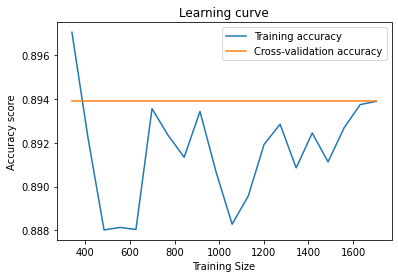

In [11]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 1234

In [12]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [13]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.891566265060241
F1 score micro: 0.891566265060241
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       814
         1.0       0.00      0.00      0.00        99

    accuracy                           0.89       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.79      0.89      0.84       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


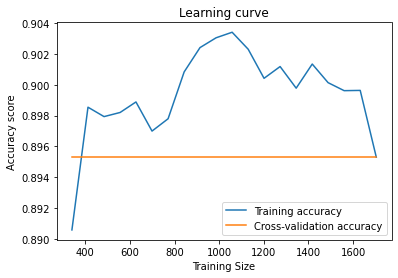

In [14]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed == 500

In [15]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [16]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)     

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.8970427163198248
F1 score micro: 0.8970427163198248
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       819
         1.0       0.00      0.00      0.00        94

    accuracy                           0.90       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.80      0.90      0.85       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


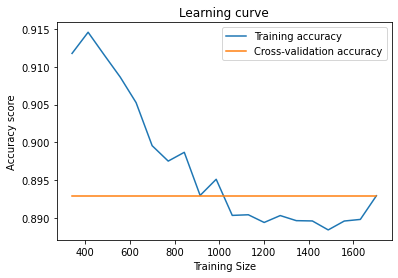

In [17]:
plot_model = svm.SVC(kernel='linear', C=0.001, gamma=0.0001)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [18]:
# learning curve considering different seeds 

In [18]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

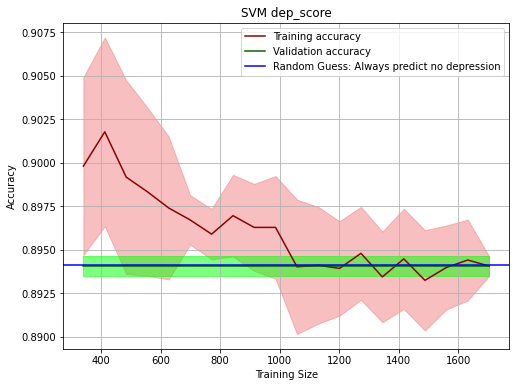

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.8941, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## Logistic Regression

## Seed 100

In [20]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [21]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8948521358159912
F1 score micro: 0.8948521358159912
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       817
         1.0       0.00      0.00      0.00        96

    accuracy                           0.89       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.80      0.89      0.85       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.89389671        nan 0.89389671 0.89389671
 0.89389671 0.89389671 0.89389671 0.89389671        nan        nan
        nan        nan        nan 0.89389671 0.89389671        nan
 0.89389671 0.89389671        nan        nan 0.89389671        nan
 0.89389671 0.89389671 0.89389671 0.89389671 0.89389671 0.89389671
        nan        nan        nan        nan        nan 0.89389671
 0.89389671        nan 0.89389671 0.89389671        nan        nan
        nan        nan 0.89389671 0.89389671 0.89389671        nan
 0.89389671 0.89389671        nan        nan        nan        nan
        nan 0.89389671 0.89389671        nan 0.89389671 0.89389671
        nan        nan 0.89389671        nan 0.89389671 0.89389671
 0.89389671 0.89389671 0.89389671 0.89389671        nan        nan
        nan        n

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


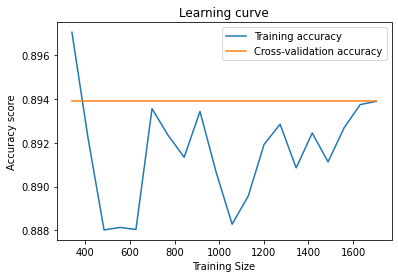

In [22]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [23]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [24]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.891566265060241
F1 score micro: 0.891566265060241
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       814
         1.0       0.00      0.00      0.00        99

    accuracy                           0.89       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.79      0.89      0.84       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.89530516        nan 0.89530516 0.89530516
 0.89530516 0.89530516 0.89530516 0.89530516        nan        nan
        nan        nan        nan 0.89530516 0.89530516        nan
 0.89530516 0.89530516        nan        nan 0.89530516        nan
 0.89530516 0.89530516 0.89530516 0.89530516 0.89530516 0.89530516
        nan        nan        nan        nan        nan 0.89530516
 0.89530516        nan 0.89530516 0.89530516        nan        nan
        nan        nan 0.89530516 0.89530516 0.89530516        nan
 0.89530516 0.89530516        nan        nan        nan        nan
        nan 0.89530516 0.89530516        nan 0.89530516 0.89530516
        nan        nan 0.89530516        nan 0.89530516 0.89530516
 0.89530516 0.89530516 0.89530516 0.89530516        nan        nan
        nan        n

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


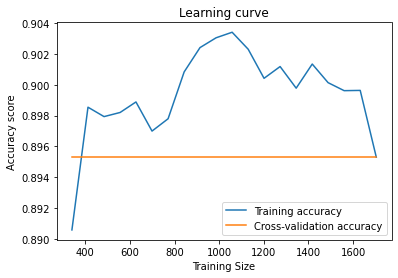

In [25]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [26]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [27]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.0001, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8970427163198248
F1 score micro: 0.8970427163198248
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       819
         1.0       0.00      0.00      0.00        94

    accuracy                           0.90       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.80      0.90      0.85       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.89295775        nan 0.89295775 0.89295775
 0.89295775 0.89295775 0.89295775 0.89295775        nan        nan
        nan        nan        nan 0.89295775 0.89295775        nan
 0.89295775 0.89295775        nan        nan 0.89295775        nan
 0.89295775 0.89295775 0.89295775 0.89295775 0.89295775 0.89295775
        nan        nan        nan        nan        nan 0.89295775
 0.89295775        nan 0.89295775 0.89295775        nan        nan
        nan        nan 0.89295775 0.89295775 0.89295775        nan
 0.89295775 0.89295775        nan        nan        nan        nan
        nan 0.89295775 0.89295775        nan 0.89295775 0.89295775
        nan        nan 0.89295775        nan 0.89295775 0.89295775
 0.89295775 0.89295775 0.89295775 0.89295775        nan        nan
        nan        n

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


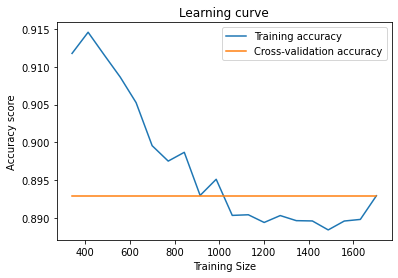

In [28]:
plot_model = LogisticRegression(C=0.0001, multi_class='auto', penalty='l1', solver='liblinear')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [30]:
# learning curve considering different seeds 

In [29]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

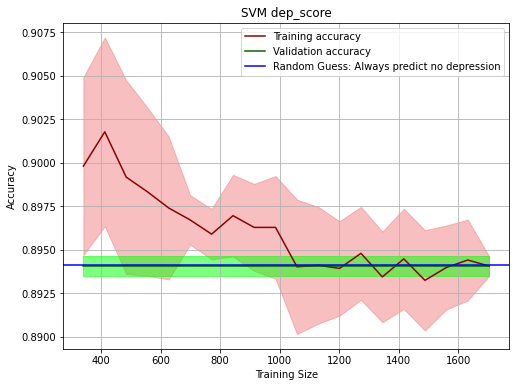

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.8941, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## KNN

## Seed 100

In [31]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [32]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'weights': 'uniform'}
Accuracy: 0.8860898138006572
F1 score micro: 0.8860898138006572
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       817
         1.0       0.00      0.00      0.00        96

    accuracy                           0.89       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.80      0.89      0.84       913



[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


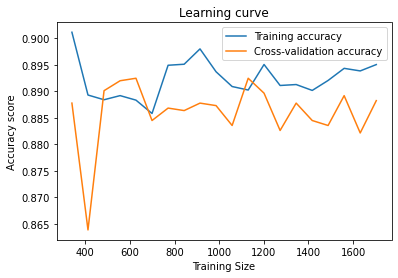

In [33]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform')

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [34]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [35]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 23, 'weights': 'uniform'}
Accuracy: 0.882803943044907
F1 score micro: 0.882803943044907
F1 score binary: 0.03603603603603604

classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       814
         1.0       0.17      0.02      0.04        99

    accuracy                           0.88       913
   macro avg       0.53      0.50      0.49       913
weighted avg       0.81      0.88      0.84       913



[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


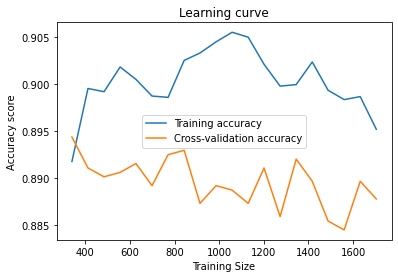

In [36]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=23, weights='uniform')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [37]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [38]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'ball_tree', 'leaf_size': 2, 'weights': 'uniform'}
Accuracy: 0.8707557502738226
F1 score micro: 0.8707557502738226
F1 score binary: 0.04838709677419355

classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       819
         1.0       0.10      0.03      0.05        94

    accuracy                           0.87       913
   macro avg       0.50      0.50      0.49       913
weighted avg       0.81      0.87      0.84       913



[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


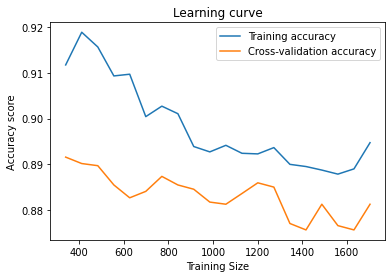

In [39]:
plot_model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, weights='uniform')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [42]:
# learning curve considering different seeds 

In [40]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

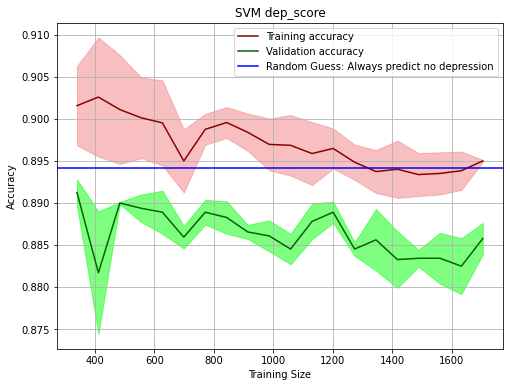

In [41]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.8941, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

## Random Forest

## Seed 100

In [42]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [43]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 38, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 26, 'n_estimators': 5}
Accuracy: 0.8948521358159912
F1 score micro: 0.8948521358159912
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       817
         1.0       0.00      0.00      0.00        96

    accuracy                           0.89       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.80      0.89      0.85       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


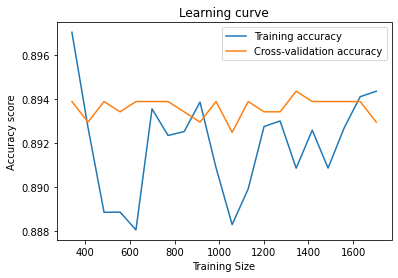

In [44]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=38, max_features='auto', min_samples_leaf=2, min_samples_split=26, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [45]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [46]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 26, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 38, 'n_estimators': 5}
Accuracy: 0.891566265060241
F1 score micro: 0.891566265060241
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       814
         1.0       0.00      0.00      0.00        99

    accuracy                           0.89       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.79      0.89      0.84       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


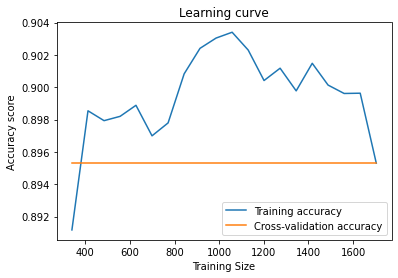

In [47]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=26, max_features='auto', min_samples_leaf=2, min_samples_split=38, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [ ]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [48]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)    

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'gini', 'max_depth': 38, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 38, 'n_estimators': 5}
Accuracy: 0.891566265060241
F1 score micro: 0.891566265060241
F1 score binary: 0.0

classification report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       814
         1.0       0.00      0.00      0.00        99

    accuracy                           0.89       913
   macro avg       0.45      0.50      0.47       913
weighted avg       0.79      0.89      0.84       913



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

[learning_curve] Training set sizes: [ 340  412  484  556  627  699  771  843  914  986 1058 1130 1201 1273
 1345 1417 1488 1560 1632 1704]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


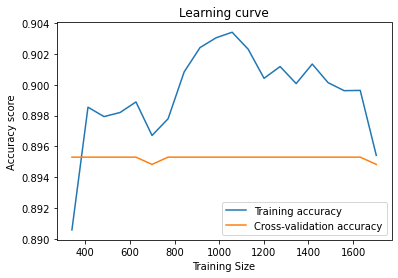

In [49]:
plot_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=38, max_features='sqrt', min_samples_leaf=2, min_samples_split=38, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [ ]:
# learning curve considering different seeds 

In [50]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

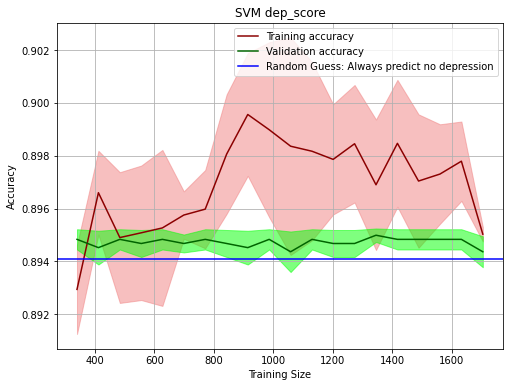

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.8941, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# 2. sampled

# SVM 

## Seed 100

In [52]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [53]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.5567010309278351
F1 score micro: 0.5567010309278351
F1 score binary: 0.5520833333333333

classification report:
               precision    recall  f1-score   support

         0.0       0.56      0.57      0.56        97
         1.0       0.56      0.55      0.55        97

    accuracy                           0.56       194
   macro avg       0.56      0.56      0.56       194
weighted avg       0.56      0.56      0.56       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


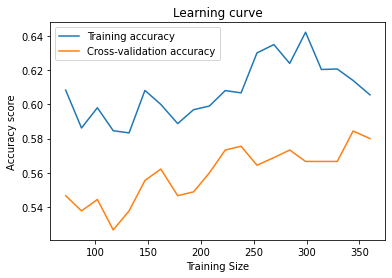

In [54]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='rbf', C=10, gamma=0.01)


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [55]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [56]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.0001, 'kernel': 'linear'}
Accuracy: 0.5876288659793815
F1 score micro: 0.5876288659793815
F1 score binary: 0.5833333333333334

classification report:
               precision    recall  f1-score   support

         0.0       0.59      0.59      0.59        98
         1.0       0.58      0.58      0.58        96

    accuracy                           0.59       194
   macro avg       0.59      0.59      0.59       194
weighted avg       0.59      0.59      0.59       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


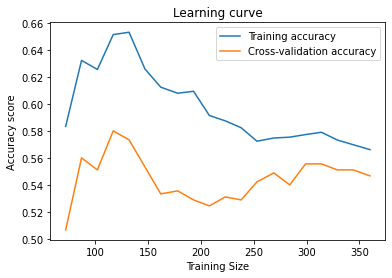

In [57]:
plot_model = svm.SVC(kernel='linear', C=10, gamma=0.0001)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [58]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [59]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC()

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, svm_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.5515463917525774
F1 score micro: 0.5515463917525774
F1 score binary: 0.5583756345177665

classification report:
               precision    recall  f1-score   support

         0.0       0.56      0.53      0.54        98
         1.0       0.54      0.57      0.56        96

    accuracy                           0.55       194
   macro avg       0.55      0.55      0.55       194
weighted avg       0.55      0.55      0.55       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


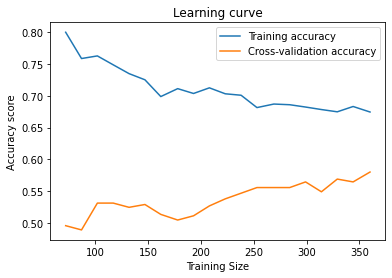

In [60]:
plot_model = svm.SVC(kernel='rbf', C=10, gamma=0.1)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [93]:
# learning curve considering different seeds 

In [61]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

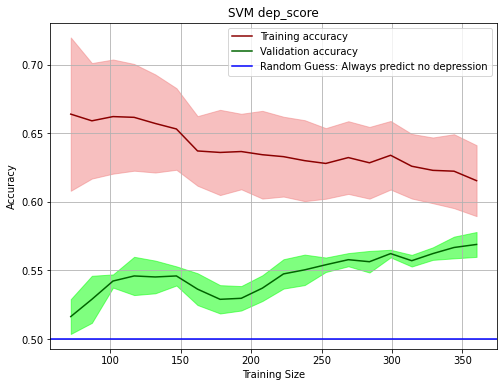

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# Logistic Regression

## Seed 100

In [63]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [64]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.5721649484536082
F1 score micro: 0.5721649484536082
F1 score binary: 0.5654450261780105

classification report:
               precision    recall  f1-score   support

         0.0       0.57      0.59      0.58        97
         1.0       0.57      0.56      0.57        97

    accuracy                           0.57       194
   macro avg       0.57      0.57      0.57       194
weighted avg       0.57      0.57      0.57       194



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.5               nan 0.46444444 0.44666667
 0.44666667 0.46666667 0.44666667 0.44666667        nan        nan
        nan        nan        nan 0.56       0.56              nan
 0.56       0.56              nan        nan 0.5               nan
 0.44666667 0.44666667 0.44666667 0.46666667 0.44666667 0.44666667
        nan        nan        nan        nan        nan 0.56
 0.56              nan 0.56       0.56              nan        nan
        nan        nan 0.47333333 0.44666667 0.44666667        nan
 0.44666667 0.44666667        nan        nan        nan        nan
        nan 0.56       0.56              nan 0.56       0.56
        nan        nan 0.5               nan 0.44666667 0.46666667
 0.46666667 0.47333333 0.46666667 0.46666667        nan        nan
        nan        nan        na

[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


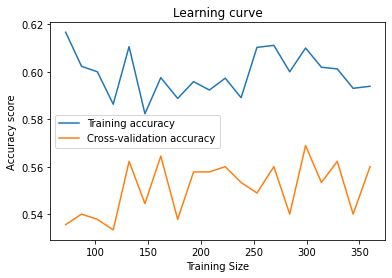

In [65]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [66]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [67]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.5979381443298969
F1 score micro: 0.5979381443298969
F1 score binary: 0.6060606060606061

classification report:
               precision    recall  f1-score   support

         0.0       0.61      0.57      0.59        98
         1.0       0.59      0.62      0.61        96

    accuracy                           0.60       194
   macro avg       0.60      0.60      0.60       194
weighted avg       0.60      0.60      0.60       194



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.49777778        nan 0.52       0.48444444
 0.48444444 0.48666667 0.48444444 0.48444444        nan        nan
        nan        nan        nan 0.54444444 0.54444444        nan
 0.54444444 0.54444444        nan        nan 0.49777778        nan
 0.50222222 0.48444444 0.48444444 0.48666667 0.48444444 0.48444444
        nan        nan        nan        nan        nan 0.54444444
 0.54444444        nan 0.54444444 0.54444444        nan        nan
        nan        nan 0.50222222 0.48444444 0.48444444        nan
 0.48444444 0.48444444        nan        nan        nan        nan
        nan 0.54444444 0.54444444        nan 0.54444444 0.54444444
        nan        nan 0.49777778        nan 0.49777778 0.49555556
 0.49555556 0.47333333 0.49555556 0.49555556        nan        nan
        nan        n

[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


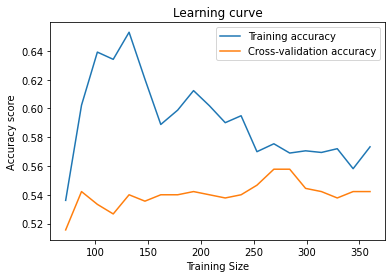

In [68]:
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='liblinear')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [69]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [70]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression()

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, log_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
best hyper parameters {'C': 10.0, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.5721649484536082
F1 score micro: 0.5721649484536082
F1 score binary: 0.5513513513513514

classification report:
               precision    recall  f1-score   support

         0.0       0.57      0.61      0.59        98
         1.0       0.57      0.53      0.55        96

    accuracy                           0.57       194
   macro avg       0.57      0.57      0.57       194
weighted avg       0.57      0.57      0.57       194



/home/sungjin/Documents/Programming/python/venv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.49777778        nan 0.47555556 0.47555556
 0.47555556 0.48       0.47555556 0.47555556        nan        nan
        nan        nan        nan 0.54666667 0.54666667        nan
 0.54666667 0.54666667        nan        nan 0.49777778        nan
 0.48       0.47555556 0.47555556 0.48       0.47555556 0.47555556
        nan        nan        nan        nan        nan 0.54666667
 0.54666667        nan 0.54666667 0.54666667        nan        nan
        nan        nan 0.47555556 0.47333333 0.47333333        nan
 0.47333333 0.47333333        nan        nan        nan        nan
        nan 0.54666667 0.54666667        nan 0.54666667 0.54666667
        nan        nan 0.49777778        nan 0.48888889 0.49777778
 0.49777778 0.50444444 0.49777778 0.49777778        nan        nan
        nan        n

[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


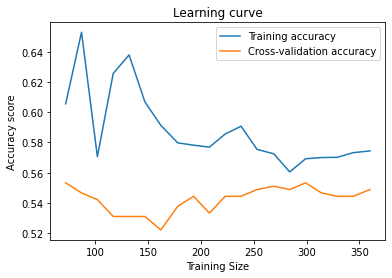

In [71]:
plot_model = LogisticRegression(C=10.0, multi_class='multinomial', penalty='l1', solver='saga')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [105]:
# learning curve considering different seeds 

In [72]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

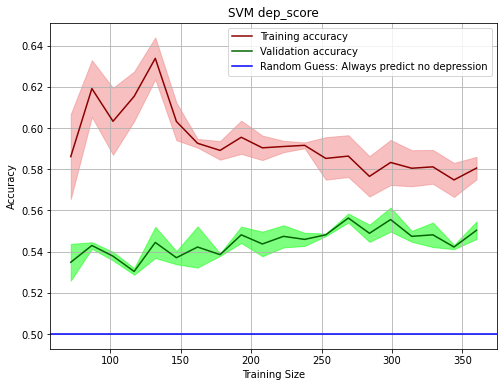

In [73]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# KNN

## Seed 100

In [74]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [75]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'weights': 'distance'}
Accuracy: 0.4742268041237113
F1 score micro: 0.4742268041237113
F1 score binary: 0.3703703703703704

classification report:
               precision    recall  f1-score   support

         0.0       0.48      0.64      0.55        97
         1.0       0.46      0.31      0.37        97

    accuracy                           0.47       194
   macro avg       0.47      0.47      0.46       194
weighted avg       0.47      0.47      0.46       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


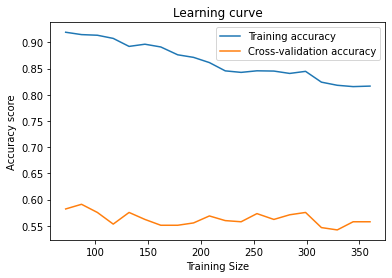

In [76]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=2, weights='distance')


train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [77]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [78]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 100, 'weights': 'uniform'}
Accuracy: 0.5154639175257731
F1 score micro: 0.5154639175257731
F1 score binary: 0.34722222222222227

classification report:
               precision    recall  f1-score   support

         0.0       0.51      0.77      0.61        98
         1.0       0.52      0.26      0.35        96

    accuracy                           0.52       194
   macro avg       0.52      0.51      0.48       194
weighted avg       0.52      0.52      0.48       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


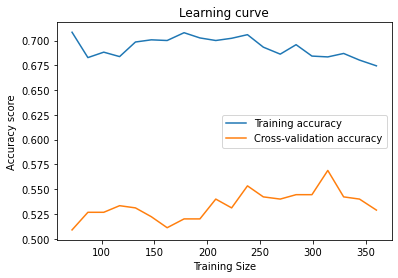

In [79]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=100, weights='uniform')

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [80]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [81]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int),
                        'n_neighbors' : [int(x) for x in np.linspace(2, 50, 10)]
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier()

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)  

# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, knn_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 12, 'weights': 'uniform'}
Accuracy: 0.5051546391752577
F1 score micro: 0.5051546391752577
F1 score binary: 0.3333333333333333

classification report:
               precision    recall  f1-score   support

         0.0       0.51      0.76      0.61        98
         1.0       0.50      0.25      0.33        96

    accuracy                           0.51       194
   macro avg       0.50      0.50      0.47       194
weighted avg       0.50      0.51      0.47       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


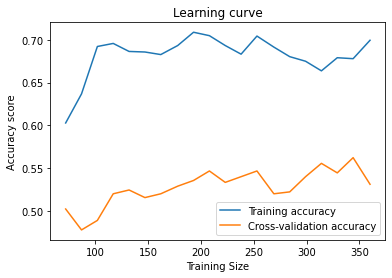

In [82]:
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=12, weights='uniform')

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [117]:
# learning curve considering different seeds

In [83]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

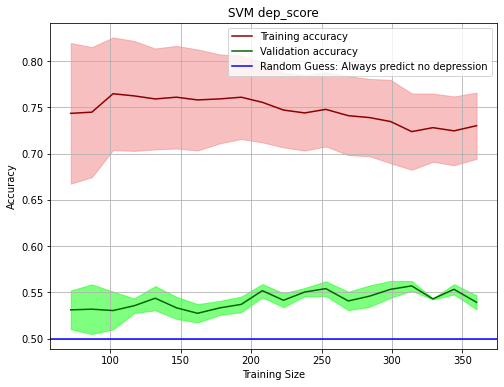

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()

# Random Forest

## Seed 100

In [85]:
seed = 100
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [86]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': False, 'criterion': 'gini', 'max_depth': 26, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 5}
Accuracy: 0.5154639175257731
F1 score micro: 0.5154639175257731
F1 score binary: 0.4659090909090909

classification report:
               precision    recall  f1-score   support

         0.0       0.51      0.61      0.56        97
         1.0       0.52      0.42      0.47        97

    accuracy                           0.52       194
   macro avg       0.52      0.52      0.51       194
weighted avg       0.52      0.52      0.51       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


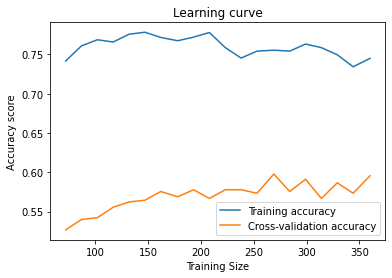

In [87]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=26, max_features='sqrt', min_samples_leaf=2, min_samples_split=14, n_estimators=5)

train_sizes_seed100, train_scores_seed100, val_scores_seed100 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed100 = np.mean(train_scores_seed100, axis = 1)
train_std_seed100  = np.std(train_scores_seed100, axis=1)
val_mean_seed100   = np.mean(val_scores_seed100, axis=1)
val_std_seed100    = np.std(val_scores_seed100, axis=1)

plt.plot(train_sizes_seed100, train_mean_seed100, label='Training accuracy')
plt.plot(train_sizes_seed100, val_mean_seed100,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 1234

In [88]:
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [89]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 14, 'min_samples_split': 2, 'n_estimators': 5}
Accuracy: 0.5567010309278351
F1 score micro: 0.5567010309278351
F1 score binary: 0.4556962025316456

classification report:
               precision    recall  f1-score   support

         0.0       0.55      0.73      0.63        98
         1.0       0.58      0.38      0.46        96

    accuracy                           0.56       194
   macro avg       0.56      0.55      0.54       194
weighted avg       0.56      0.56      0.54       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


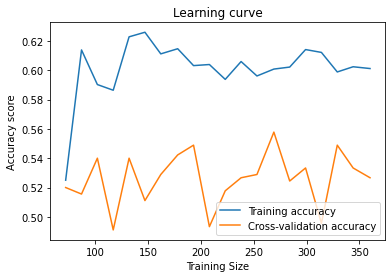

In [90]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=50, max_features='auto', min_samples_leaf=14, min_samples_split=2, n_estimators=5)

train_sizes_seed1234, train_scores_seed1234, val_scores_seed1234 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed1234 = np.mean(train_scores_seed1234, axis = 1)
train_std_seed1234  = np.std(train_scores_seed1234, axis=1)
val_mean_seed1234   = np.mean(val_scores_seed1234, axis=1)
val_std_seed1234    = np.std(val_scores_seed1234, axis=1)

plt.plot(train_sizes_seed1234, train_mean_seed1234, label='Training accuracy')
plt.plot(train_sizes_seed1234, val_mean_seed1234,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Seed 500

In [91]:
seed = 500
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=seed)  
folds = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [92]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier()

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1) 

# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))
print("F1 score binary:", f1_score(y_test, rf_y_pred, average='binary'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits
best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 38, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 14, 'n_estimators': 5}
Accuracy: 0.520618556701031
F1 score micro: 0.520618556701031
F1 score binary: 0.5079365079365079

classification report:
               precision    recall  f1-score   support

         0.0       0.52      0.54      0.53        98
         1.0       0.52      0.50      0.51        96

    accuracy                           0.52       194
   macro avg       0.52      0.52      0.52       194
weighted avg       0.52      0.52      0.52       194



[learning_curve] Training set sizes: [ 72  87 102 117 132 147 162 178 193 208 223 238 253 269 284 299 314 329
 344 360]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


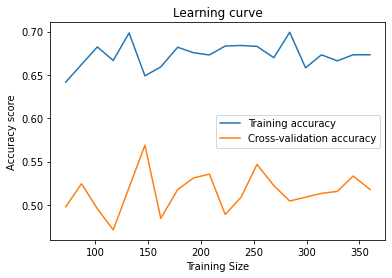

In [93]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=38, max_features='log2', min_samples_leaf=2, min_samples_split=14, n_estimators=5)

train_sizes_seed500, train_scores_seed500, val_scores_seed500 = learning_curve(plot_model, 
                                                                X_train, 
                                                                y_train, 
                                                                cv=5, 
                                                                scoring='accuracy', 
                                                                n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                                train_sizes=np.linspace(0.2, 1, 20), 
                                                                verbose=2)


train_mean_seed500 = np.mean(train_scores_seed500, axis = 1)
train_std_seed500  = np.std(train_scores_seed500, axis=1)
val_mean_seed500   = np.mean(val_scores_seed500, axis=1)
val_std_seed500    = np.std(val_scores_seed500, axis=1)

plt.plot(train_sizes_seed500, train_mean_seed500, label='Training accuracy')
plt.plot(train_sizes_seed500, val_mean_seed500,   label='Cross-validation accuracy')
plt.title ('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [ ]:
# learning curve considering different seeds

In [94]:
acc_avg = list()
acc_se  = list()

val_avg = list()
val_se  = list()

for i in range(len(train_sizes_seed100)):
    acc_avg.append(np.mean([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]))
    acc_se .append(np.std ([train_mean_seed100[i], train_mean_seed500[i], train_mean_seed1234[i]]) / np.sqrt(3))
    
    val_avg.append(np.mean([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]))
    val_se .append(np.std ([val_mean_seed100[i], val_mean_seed500[i], val_mean_seed1234[i]]) / np.sqrt(3))

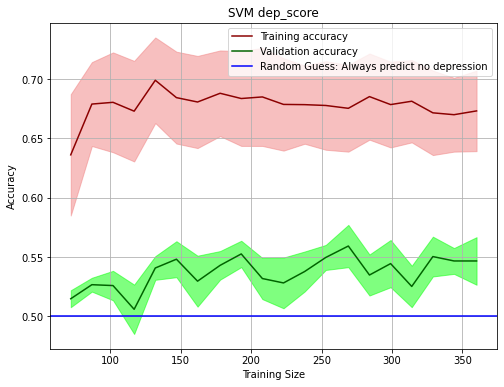

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(train_sizes_seed100, acc_avg, c='darkred', label='Training accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(acc_avg, acc_se), np.add(acc_avg, acc_se), color='lightcoral', alpha=0.5)

ax.plot(train_sizes_seed100, val_avg, c='darkgreen', label='Validation accuracy')
ax.fill_between(train_sizes_seed100, np.subtract(val_avg, val_se), np.add(val_avg, val_se), color='lime', alpha=0.5)

ax.set_xlabel('Training Size')
ax.set_ylabel('Accuracy')
ax.set_title('SVM dep_score')
ax.axhline(y=0.5, color='blue', linestyle='-', label='Random Guess: Always predict no depression')
ax.legend()
ax.grid()